In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm 

In [137]:
def plot_beta(alpha, beta, ax, title=None, label=None, xticks=[0.0, 0.5, 1.0]):

    # Build a beta distribtuion scipy object.
    dist = stats.beta(alpha, beta)

    # The support (always this for the beta dist).
    x = np.linspace(0.0, 1.0, 10001)

    # The probability density at each sample support value.
    y = dist.pdf(x)

    # Plot it all.
    lines = ax.plot(x, y, label=label)
    ax.fill_between(x, y, alpha=0.2, color=lines[0].get_c())
    if title: 
        ax.set_title(title)
    ax.get_yaxis().set_ticks([])
    #ax.get_yaxis().set_ticks([np.max(y)])
    ax.get_xaxis().set_ticks(xticks)
    ax.set_ylim(0.0, np.max(y)*1.2)

def get_beta_dist_params(dist_samples):
    dist_samples = np.array(dist_samples)
    num_conversions = dist_samples.sum()
    total_visitors = len(dist_samples)
    alpha = num_conversions + 1
    beta = (total_visitors - num_conversions) + 1
    mean = 1 * num_conversions / total_visitors
    return alpha, beta, mean, num_conversions, total_visitors

def plot_beta_dist(website_samples, ax, label=None, xlim=(0,1)):
    alpha, beta, mean, num_conversions, total_visitors = get_beta_dist_params(website_samples)
    title = None if label else r"Converted {}/{}".format(num_conversions, total_visitors)
    plot_beta(alpha, beta, ax, title, label, [0.0, mean, 1.0])
    ax.set_xlabel("Win Rate")
    ax.set_ylabel("Probability Density")
    ax.set_xlim(xlim)
    
def get_samples(df, columns, param1, param2, scale=0):
    new_df = df[columns]
    a = new_df[new_df[param1] > new_df[param2] + scale]
    return a[columns[0]]

In [254]:
chall_df = pd.read_csv('Data/Challenger_Ranked_Games.csv')
gm_df = pd.read_csv('Data/GrandMaster_Ranked_Games.csv')
m_df = pd.read_csv('Data/Master_Ranked_Games.csv')
chall_df_clean = chall_df[chall_df['gameDuraton'] > 600].copy()
chall_df_clean = chall_df_clean[chall_df_clean['gameDuraton'] < 1800].copy()
gm_df_clean = gm_df[gm_df['gameDuraton'] > 600].copy()
gm_df_clean = gm_df_clean[gm_df_clean['gameDuraton'] < 1800].copy()
m_df_clean = m_df[m_df['gameDuraton'] > 600].copy()
m_df_clean = m_df_clean[m_df_clean['gameDuraton'] < 1800].copy()
chall_df_clean['blueVisionScore'] = chall_df_clean['blueWardPlaced'] + chall_df_clean['blueWardkills']
chall_df_clean['redVisionScore'] = chall_df_clean['redWardPlaced'] + chall_df_clean['redWardkills']

In [134]:
chall_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20924 entries, 0 to 26903
Data columns (total 52 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gameId                   20924 non-null  int64  
 1   gameDuraton              20924 non-null  int64  
 2   blueWins                 20924 non-null  int64  
 3   blueFirstBlood           20924 non-null  int64  
 4   blueFirstTower           20924 non-null  int64  
 5   blueFirstBaron           20924 non-null  int64  
 6   blueFirstDragon          20924 non-null  int64  
 7   blueFirstInhibitor       20924 non-null  int64  
 8   blueDragonKills          20924 non-null  int64  
 9   blueBaronKills           20924 non-null  int64  
 10  blueTowerKills           20924 non-null  int64  
 11  blueInhibitorKills       20924 non-null  int64  
 12  blueWardPlaced           20924 non-null  int64  
 13  blueWardkills            20924 non-null  int64  
 14  blueKills             

In [4]:
chall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26904 entries, 0 to 26903
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gameId                   26904 non-null  int64  
 1   gameDuraton              26904 non-null  int64  
 2   blueWins                 26904 non-null  int64  
 3   blueFirstBlood           26904 non-null  int64  
 4   blueFirstTower           26904 non-null  int64  
 5   blueFirstBaron           26904 non-null  int64  
 6   blueFirstDragon          26904 non-null  int64  
 7   blueFirstInhibitor       26904 non-null  int64  
 8   blueDragonKills          26904 non-null  int64  
 9   blueBaronKills           26904 non-null  int64  
 10  blueTowerKills           26904 non-null  int64  
 11  blueInhibitorKills       26904 non-null  int64  
 12  blueWardPlaced           26904 non-null  int64  
 13  blueWardkills            26904 non-null  int64  
 14  blueKills             

In [5]:
gm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65896 entries, 0 to 65895
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gameId                   65896 non-null  int64  
 1   gameDuraton              65896 non-null  int64  
 2   blueWins                 65896 non-null  int64  
 3   blueFirstBlood           65896 non-null  int64  
 4   blueFirstTower           65896 non-null  int64  
 5   blueFirstBaron           65896 non-null  int64  
 6   blueFirstDragon          65896 non-null  int64  
 7   blueFirstInhibitor       65896 non-null  int64  
 8   blueDragonKills          65896 non-null  int64  
 9   blueBaronKills           65896 non-null  int64  
 10  blueTowerKills           65896 non-null  int64  
 11  blueInhibitorKills       65896 non-null  int64  
 12  blueWardPlaced           65896 non-null  int64  
 13  blueWardkills            65896 non-null  int64  
 14  blueKills             

In [6]:
m_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107125 entries, 0 to 107124
Data columns (total 50 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   gameId                   107125 non-null  int64  
 1   gameDuraton              107125 non-null  int64  
 2   blueWins                 107125 non-null  int64  
 3   blueFirstBlood           107125 non-null  int64  
 4   blueFirstTower           107125 non-null  int64  
 5   blueFirstBaron           107125 non-null  int64  
 6   blueFirstDragon          107125 non-null  int64  
 7   blueFirstInhibitor       107125 non-null  int64  
 8   blueDragonKills          107125 non-null  int64  
 9   blueBaronKills           107125 non-null  int64  
 10  blueTowerKills           107125 non-null  int64  
 11  blueInhibitorKills       107125 non-null  int64  
 12  blueWardPlaced           107125 non-null  int64  
 13  blueWardkills            107125 non-null  int64  
 14  blue

In [7]:
m_df_blue = m_df.iloc[:,2:26]
m_df_red = m_df.iloc[:,26:]

In [8]:
m_df_blue.info()
m_df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107125 entries, 0 to 107124
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   blueWins                 107125 non-null  int64  
 1   blueFirstBlood           107125 non-null  int64  
 2   blueFirstTower           107125 non-null  int64  
 3   blueFirstBaron           107125 non-null  int64  
 4   blueFirstDragon          107125 non-null  int64  
 5   blueFirstInhibitor       107125 non-null  int64  
 6   blueDragonKills          107125 non-null  int64  
 7   blueBaronKills           107125 non-null  int64  
 8   blueTowerKills           107125 non-null  int64  
 9   blueInhibitorKills       107125 non-null  int64  
 10  blueWardPlaced           107125 non-null  int64  
 11  blueWardkills            107125 non-null  int64  
 12  blueKills                107125 non-null  int64  
 13  blueDeath                107125 non-null  int64  
 14  blue

In [9]:
m_df_blue.corr()

,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,...,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt
blueWins,1.000000,0.208979,0.472211,0.369585,0.276402,0.668425,0.455406,0.355497,0.723008,0.583411,...,0.328040,0.153082,0.248268,0.067803,0.192247,0.192247,0.201437,0.387202,0.192846,0.527904
blueFirstBlood,0.208979,1.000000,0.220634,0.050738,0.142845,0.157705,0.136477,0.043951,0.190511,0.124774,...,0.084498,0.041193,0.078277,0.039860,0.051018,0.051018,0.056709,0.121124,0.034819,0.144270
blueFirstTower,0.472211,0.220634,1.000000,0.145523,0.224847,0.397007,0.298754,0.124413,0.496109,0.323699,...,0.164791,0.115336,0.198912,0.118411,0.153919,0.153919,0.192193,0.255915,0.102505,0.386796
blueFirstBaron,0.369585,0.050738,0.145523,1.000000,0.132850,0.410164,0.441767,0.886130,0.528847,0.414582,...,0.231409,0.312299,0.423081,0.401575,0.385228,0.385228,0.484125,0.270866,0.380609,0.651391
blueFirstDragon,0.276402,0.142845,0.224847,0.132850,1.000000,0.186230,0.586899,0.123915,0.300609,0.141852,...,-0.045051,0.002572,0.080543,0.190257,0.044485,0.044485,0.268259,0.058621,0.088643,0.356591
blueFirstInhibitor,0.668425,0.157705,0.397007,0.410164,0.186230,1.000000,0.405637,0.385164,0.782831,0.785919,...,0.389297,0.297246,0.376793,0.156892,0.321487,0.321487,0.260849,0.415279,0.284947,0.557738
blueDragonKills,0.455406,0.136477,0.298754,0.441767,0.586899,0.405637,1.000000,0.474558,0.623088,0.405868,...,0.179914,0.329062,0.456738,0.553720,0.389783,0.389783,0.670585,0.288019,0.451725,0.802850
blueBaronKills,0.355497,0.043951,0.124413,0.886130,0.123915,0.385164,0.474558,1.000000,0.540374,0.454216,...,0.271325,0.396292,0.500591,0.470616,0.446875,0.446875,0.546634,0.302245,0.469332,0.715454
blueTowerKills,0.723008,0.190511,0.496109,0.528847,0.300609,0.782831,0.623088,0.540374,1.000000,0.780148,...,0.363262,0.414968,0.559752,0.445335,0.465059,0.465059,0.546419,0.473354,0.446814,0.823877
blueInhibitorKills,0.583411,0.124774,0.323699,0.414582,0.141852,0.785919,0.405868,0.454216,0.780148,1.000000,...,0.467621,0.453039,0.508025,0.210576,0.436088,0.436088,0.282899,0.496463,0.391103,0.581210


In [10]:
m_df_red.corr()

,redWins,redFirstBlood,redFirstTower,redFirstBaron,redFirstDragon,redFirstInhibitor,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
redWins,1.000000,0.209282,0.471455,0.396186,0.281737,0.655057,0.470271,0.381315,0.728810,0.578057,...,0.332346,0.173848,0.275944,0.109334,0.221730,0.221730,0.247116,0.397022,0.220708,0.557780
redFirstBlood,0.209282,1.000000,0.221325,0.055745,0.143543,0.157353,0.137645,0.050123,0.191544,0.129137,...,0.093045,0.049901,0.089735,0.046416,0.067637,0.067637,0.063948,0.133657,0.041991,0.149507
redFirstTower,0.471455,0.221325,1.000000,0.139931,0.218930,0.387465,0.273799,0.115574,0.474712,0.322710,...,0.171968,0.114934,0.191292,0.088955,0.152229,0.152229,0.165999,0.265146,0.090783,0.358227
redFirstBaron,0.396186,0.055745,0.139931,1.000000,0.164575,0.424891,0.478562,0.878913,0.551792,0.420620,...,0.240586,0.319876,0.436378,0.423805,0.399478,0.399478,0.507313,0.280960,0.392133,0.672978
redFirstDragon,0.281737,0.143543,0.218930,0.164575,1.000000,0.181271,0.602207,0.152402,0.310868,0.132150,...,-0.056650,0.004068,0.093746,0.251900,0.060856,0.060856,0.330749,0.050572,0.105384,0.383447
redFirstInhibitor,0.655057,0.157353,0.387465,0.424891,0.181271,1.000000,0.398818,0.396883,0.778417,0.783726,...,0.391698,0.309457,0.390088,0.171756,0.338380,0.338380,0.272713,0.422950,0.295399,0.562035
redDragonKills,0.470271,0.137645,0.273799,0.478562,0.602207,0.398818,1.000000,0.513207,0.632133,0.398732,...,0.181884,0.336974,0.472321,0.596538,0.408786,0.408786,0.710578,0.292832,0.463035,0.819190
redBaronKills,0.381315,0.050123,0.115574,0.878913,0.152402,0.396883,0.513207,1.000000,0.565124,0.465714,...,0.284693,0.411875,0.521806,0.500545,0.466808,0.466808,0.575070,0.313948,0.486266,0.740140
redTowerKills,0.728810,0.191544,0.474712,0.551792,0.310868,0.778417,0.632133,0.565124,1.000000,0.780838,...,0.372067,0.428829,0.577115,0.467473,0.486870,0.486870,0.567984,0.482336,0.460820,0.834565
redInhibitorKills,0.578057,0.129137,0.322710,0.420620,0.132150,0.783726,0.398732,0.465714,0.780838,1.000000,...,0.469853,0.463652,0.520218,0.228514,0.450267,0.450267,0.299055,0.501849,0.402095,0.589352


In [11]:
vision_df = m_df[['gameId','gameDuraton','blueWins','redWins','blueWardPlaced','redWardPlaced']]

In [12]:
vision_df_blue_wins = vision_df[vision_df['blueWins']> 0]
vision_df_blue_losses = vision_df[vision_df['blueWins'] == 0]

In [13]:
vision_df_blue_wins.reset_index(inplace=True)
vision_df_blue_losses.reset_index(inplace=True)

In [14]:
vision_df_blue_wins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53041 entries, 0 to 53040
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   index           53041 non-null  int64
 1   gameId          53041 non-null  int64
 2   gameDuraton     53041 non-null  int64
 3   blueWins        53041 non-null  int64
 4   redWins         53041 non-null  int64
 5   blueWardPlaced  53041 non-null  int64
 6   redWardPlaced   53041 non-null  int64
dtypes: int64(7)
memory usage: 2.8 MB


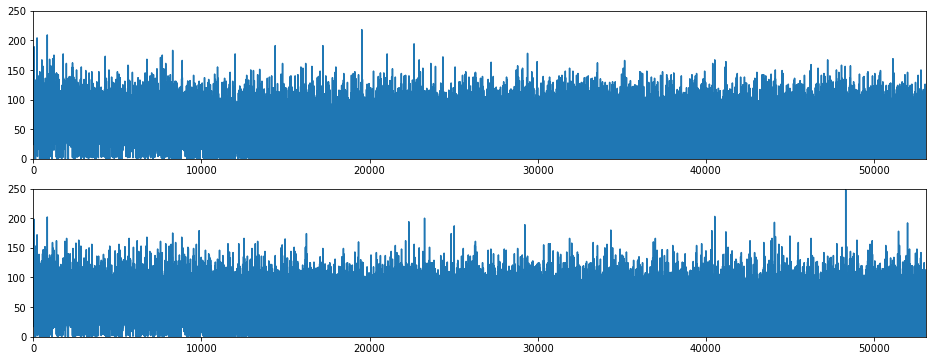

In [15]:
x = np.linspace(0, 5000, num = 1000)

fig, axs = plt.subplots(2, figsize = (16,6))
axs[0].plot(vision_df_blue_wins[['blueWardPlaced']])
axs[0].set_xlim(0, 53100)
axs[0].set_ylim(0,250)


axs[1].plot(vision_df_blue_wins[['redWardPlaced']])
axs[1].set_xlim(0, 53100)
axs[1].set_ylim(0,250)

plt.show();

In [16]:
p_value = stats.mannwhitneyu(vision_df_blue_wins[['blueWardPlaced']],vision_df_blue_wins[['redWardPlaced']], alternative="greater")

In [17]:
p_value

MannwhitneyuResult(statistic=1483605127.5, pvalue=5.001379862078499e-54)

In [18]:
from math import ceil
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

from glm.glm import GLM
from glm.families import Gaussian

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [19]:
model = sm.OLS(vision_df_blue_wins[['blueWins']],vision_df_blue_wins[['blueWardPlaced']])
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:               blueWins   R-squared (uncentered):                   0.765
Model:                            OLS   Adj. R-squared (uncentered):              0.765
Method:                 Least Squares   F-statistic:                          1.724e+05
Date:                Thu, 29 Oct 2020   Prob (F-statistic):                        0.00
Time:                        11:47:11   Log-Likelihood:                         -36883.
No. Observations:               53041   AIC:                                  7.377e+04
Df Residuals:                   53040   BIC:                                  7.378e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [20]:
x = vision_df_blue_wins[['blueWardPlaced','redWardPlaced','gameDuraton']]
# x = x[0:1000]

In [21]:
y = vision_df_blue_wins['blueWins']
# y = y[0:1000]

In [22]:
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:               blueWins   R-squared (uncentered):                   0.934
Model:                            OLS   Adj. R-squared (uncentered):              0.934
Method:                 Least Squares   F-statistic:                          2.484e+05
Date:                Thu, 29 Oct 2020   Prob (F-statistic):                        0.00
Time:                        11:47:11   Log-Likelihood:                         -3355.6
No. Observations:               53041   AIC:                                      6717.
Df Residuals:                   53038   BIC:                                      6744.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [23]:
y_predict = results.predict(x)
y_predict

0        0.964464
1        0.622236
2        0.635041
3        1.086155
4        0.924009
           ...   
53036    1.317018
53037    1.138370
53038    0.996554
53039    1.418470
53040    0.758077
Length: 53041, dtype: float64

In [24]:
residuals = y_predict - y

In [25]:
residuals

0       -0.035536
1       -0.377764
2       -0.364959
3        0.086155
4       -0.075991
           ...   
53036    0.317018
53037    0.138370
53038   -0.003446
53039    0.418470
53040   -0.241923
Length: 53041, dtype: float64

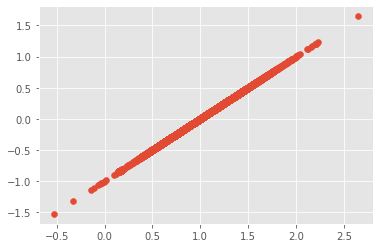

In [26]:
plt.scatter(y_predict,residuals);

In [27]:
new_df = m_df[m_df['blueTotalGold'] > 10000]
new_df = new_df[new_df['blueTotalGold']< 80000]
# wins_df = new_df[new_df['blueWins'] > 0]

In [28]:
# x = sm.tools.tools.add_constant(new_df[['blueWardPlaced','blueWardkills','redWardkills','redWardPlaced','gameDuraton','blueKills','redKills']].values)
x = sm.tools.tools.add_constant(new_df[['blueWardPlaced','blueWardkills','gameDuraton','blueKills']].values)
# x = x[0:1000]

In [29]:
y = new_df['blueTotalGold']
# y = y[0:1000]

In [30]:
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          blueTotalGold   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                 3.222e+05
Date:                Thu, 29 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:47:11   Log-Likelihood:            -1.0007e+06
No. Observations:              103221   AIC:                         2.001e+06
Df Residuals:                  103216   BIC:                         2.001e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2333.3940     54.585     42.748      0.0

In [31]:
y_predict = results.predict(x)
y_predict

array([34909.2431412 , 31747.58121476, 56054.44813726, ...,
       60704.32282614, 49078.85055725, 36047.4543736 ])

In [32]:
residuals = y_predict - y

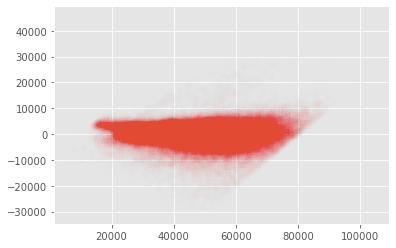

In [33]:
plt.scatter(y_predict,residuals, alpha=0.005);

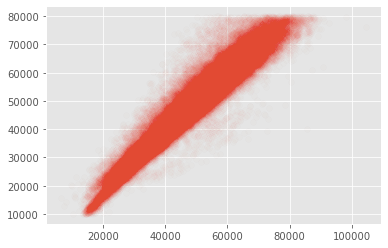

In [34]:
plt.scatter(y_predict,y,alpha=0.01)

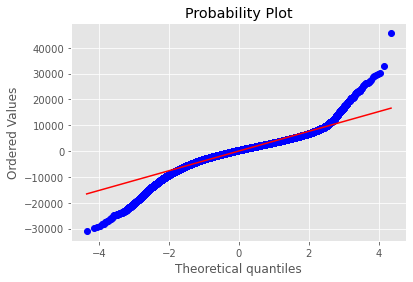

In [35]:
stats.probplot(residuals, dist="norm", plot=plt)
plt.show();

In [36]:
new_df = gm_df[gm_df['blueTotalGold'] > 10000]
new_df = new_df[new_df['blueTotalGold']< 80000]
# wins_df = new_df[new_df['blueWins'] > 0]

In [37]:
# x = sm.tools.tools.add_constant(new_df[['blueWardPlaced','blueWardkills','redWardkills','redWardPlaced','gameDuraton','blueKills','redKills']].values)
x = sm.tools.tools.add_constant(new_df[['blueWardPlaced','blueWardkills','gameDuraton','blueKills']].values)
# x = x[0:1000]

In [38]:
y = new_df['blueTotalGold']
# y = y[0:1000]

In [39]:
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          blueTotalGold   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                 1.969e+05
Date:                Thu, 29 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:47:12   Log-Likelihood:            -6.1503e+05
No. Observations:               63512   AIC:                         1.230e+06
Df Residuals:                   63507   BIC:                         1.230e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1643.2626     70.509     23.306      0.0

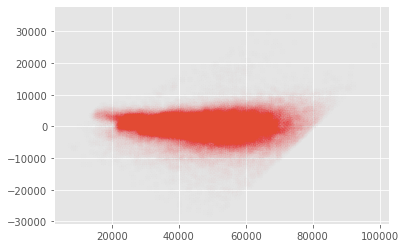

In [40]:
y_predict = results.predict(x)
residuals = y_predict - y
# y_predict
plt.scatter(y_predict,residuals, alpha=0.005);

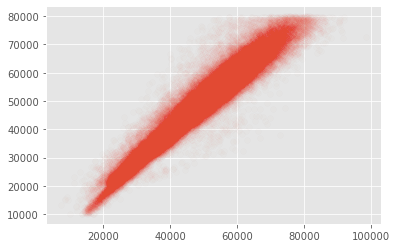

In [41]:
plt.scatter(y_predict,y,alpha=0.01);

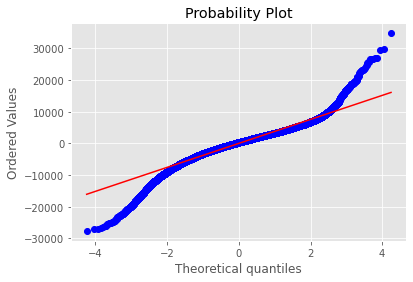

In [42]:
stats.probplot(residuals, dist="norm", plot=plt)
plt.show();

In [43]:
new_df = chall_df[chall_df['blueTotalGold'] > 10000]
new_df = new_df[new_df['blueTotalGold']< 80000]
# wins_df = new_df[new_df['blueWins'] > 0]

NormaltestResult(statistic=989.4204615306272, pvalue=1.412786829287968e-215)


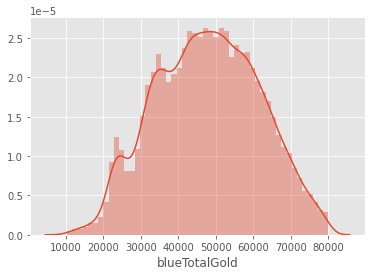

In [52]:
print(stats.normaltest(new_df['blueTotalGold']))
sns.distplot(new_df['blueTotalGold']);

In [53]:
columns = ['blueTotalGold','blueVisionScore','blueKills']
chall_df_clean['logblueTotalGold'] = chall_df_clean['blueTotalGold'].apply((lambda row: np.log(
            row) if row != 0 else 0))
# chall_df_clean.mean()
drop_vision_df = chall_df_clean[chall_df_clean['blueVisionScore'] > 0]
# sns.pairplot(drop_vision_df[0:26])

In [114]:
new_df['blueVisionScore'] = new_df['blueWardPlaced'] + new_df['blueWardkills']
columns = ['blueWardPlaced','blueKills']
x = sm.tools.tools.add_constant(new_df[columns].values)
y = new_df['blueTotalGold']
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          blueTotalGold   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                 7.354e+04
Date:                Thu, 29 Oct 2020   Prob (F-statistic):               0.00
Time:                        12:21:34   Log-Likelihood:            -2.6018e+05
No. Observations:               26014   AIC:                         5.204e+05
Df Residuals:                   26011   BIC:                         5.204e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.438e+04     94.630    151.996      0.0

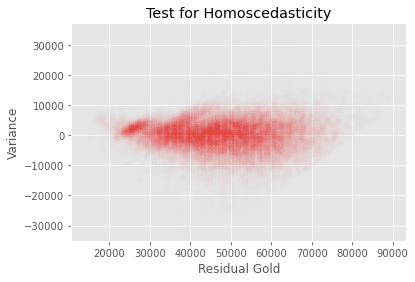

In [115]:
y_predict = results.predict(x)
residuals = y_predict - y
# y_predict
fig,ax = plt.subplots(1,1)
ax.scatter(y_predict,residuals, alpha=0.005)
plt.title("Test for Homoscedasticity")
ax.set_xlabel("Residual Gold")
ax.set_ylabel("Variance");

In [116]:
ax.scatter(y_predict,y,alpha=0.01);

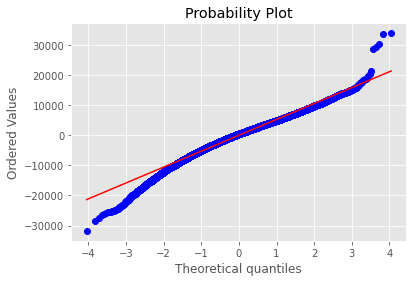

In [117]:
stats.probplot(residuals, dist="norm", plot=plt)
plt.show();

In [131]:
df = pd.read_csv("Data/high_diamond_ranked_10min.csv")

columns = ['blueWardsPlaced','blueKills']

xtest = sm.tools.tools.add_constant(df[columns].values)
ytest = df['blueTotalGold']

yhat = results.predict(xtest)
prediction = list(map(round,yhat))

Actual = np.array(list(ytest.values))
print(prediction[0:50])
print(Actual[0:50])

[28253.0, 21320.0, 23706.0, 27152.0, 35806.0, 22617.0, 24354.0, 22185.0, 23922.0, 20668.0, 22181.0, 31071.0, 24354.0, 20884.0, 21100.0, 20664.0, 26096.0, 26284.0, 23266.0, 21104.0, 26964.0, 20668.0, 21532.0, 34717.0, 26728.0, 21532.0, 25223.0, 24570.0, 44028.0, 20880.0, 26956.0, 22401.0, 22189.0, 21969.0, 28241.0, 22177.0, 18714.0, 23049.0, 22841.0, 20880.0, 23910.0, 30851.0, 26092.0, 21320.0, 20880.0, 24114.0, 26964.0, 25439.0, 19363.0, 22185.0]
[17210 14712 16113 15157 16400 15899 16874 15305 16401 15057 15474 16695
 17865 14979 15722 15015 19733 14852 16282 14994 18606 15878 15773 15906
 16515 15415 17178 17226 17474 14905 18132 16053 16438 15634 16085 14981
 15421 15665 17528 15032 15483 19226 16945 15000 15888 12925 19250 18355
 13978 15851]


In [126]:
correct = np.array(np.where(Actual==prediction)[0])
correct

array([], dtype=int64)

NormaltestResult(statistic=1934.7130533446245, pvalue=0.0)


(array([1.3000e+01, 1.0200e+02, 4.6300e+02, 2.6330e+03, 9.8070e+03,
        1.0953e+04, 1.9230e+03, 1.1100e+02, 5.0000e+00, 4.0000e+00]),
 array([-28916.84851044, -23052.176779  , -17187.50504756, -11322.83331612,
         -5458.16158469,    406.51014675,   6271.18187819,  12135.85360963,
         18000.52534107,  23865.19707251,  29729.86880395]),
 <a list of 10 Patch objects>)

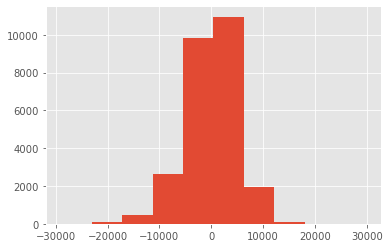

In [112]:
print(stats.normaltest(residuals))
plt.hist(residuals)

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [60]:
x = new_df[columns]

vif_data = pd.DataFrame()
vif_data["feature"] = x.columns

vif_data["VIF"] = [variance_inflation_factor(x.values, i) 
                          for i in range(len(x.columns))] 

p_values = pd.DataFrame(results.pvalues)
vif_data["p_values"] = p_values.values[1:]
# p_values.values[1:]
  
vif_data.head()

,feature,VIF,p_values
0,blueWardPlaced,7.041618,0.000000e+00
1,blueKills,5.426002,0.000000e+00
2,blueTotalHeal,8.031622,0.000000e+00
3,blueObjectDamageDealt,7.095036,2.269616e-18


In [156]:
columns = ['blueWardPlaced','blueKills']

Xtrain = new_df[columns] 
ytrain = new_df[['blueWins']] 
   
# building the model and fitting the data 
log_reg = sm.Logit(ytrain, Xtrain).fit() 

Optimization terminated successfully.
         Current function value: 0.619190
         Iterations 6


In [157]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               blueWins   No. Observations:                26014
Model:                          Logit   Df Residuals:                    26012
Method:                           MLE   Df Model:                            1
Date:                Thu, 29 Oct 2020   Pseudo R-squ.:                  0.1067
Time:                        13:21:11   Log-Likelihood:                -16108.
converged:                       True   LL-Null:                       -18031.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
blueWardPlaced    -0.0207      0.000    -45.806      0.000      -0.022      -0.020
blueKills          0.0644      0.001     51.285      0.000       0.062       0.067
==================================================================================
"""

In [159]:
df = pd.read_csv("Data/high_diamond_ranked_10min.csv")

columns = ['blueWardsPlaced','blueKills']

xtest = df[columns]
ytest = df['blueWins']

yhat = log_reg.predict(xtest)
prediction = list(map(round,yhat))

Actual = np.array(list(ytest.values))

In [160]:
correct = np.array(np.where(Actual==prediction)[0])
len(correct)

5956

In [161]:

from sklearn.metrics import (confusion_matrix,  
                           accuracy_score) 
  
# confusion matrix 
cm = confusion_matrix(ytest, prediction)  
print ("Confusion Matrix : \n", cm)  
  
# accuracy score of the model 
print('Test accuracy = ', accuracy_score(ytest, prediction))


Confusion Matrix : 
 [[2984 1965]
 [1958 2972]]
Test accuracy =  0.602895029861322



    1. Event A1. It rains on Marie's wedding.
    2. Event A2. It does not rain on Marie's wedding.
    3. Event B. The weatherman predicts rain.

In terms of probabilities, we know the following:

    1. P( A1 ) = 5/365 =0.0136985 [It rains 5 days out of the year.]
    2. P( A2 ) = 360/365 = 0.9863014 [It does not rain 360 days out of the year.]
    3. P( B | A1 ) = 0.9 [When it rains, the weatherman predicts rain 90% of the time.]
    4. P( B | A2 ) = 0.1 [When it does not rain, the weatherman predicts rain 10% of the time.]

We want to know P( A1 | B ), the probability it will rain on the day of Marie's wedding, given a forecast for rain by the weatherman. The answer can be determined from Bayes' theorem, as shown below.

1. P( A1 | B ) =   	P( A1 ) P( B | A1 ) P( A1 ) P( B | A1 ) + P( A2 ) P( B | A2 )

2. P( A1 | B ) = 	(0.014)(0.9) [ (0.014)(0.9) + (0.986)(0.1) ]

3. P( A1 | B ) = 	0.111

Note the somewhat unintuitive result. Even when the weatherman predicts rain, it rains only about 11% of the time. Despite the weatherman's gloomy prediction, there is a good chance that Marie will not get rained on at her wedding. 

In [61]:
blue_gold_greater = chall_df[chall_df['blueTotalGold'] > chall_df['redTotalGold']]

In [62]:
blue_wins = chall_df[chall_df['blueWins'] > 0]
len(blue_wins['blueWins'])

13454

In [63]:
print(len(blue_wins[blue_wins['blueTotalGold'] > blue_wins['redTotalGold']]))
print(26904 - 13152)
print(13152 / 26904)
print(13152/13454)
print(13454 - 13152)
print( (0.489*0.978) / ((0.489 * 0.978) + (0.511 * 0.022) ) )
print(0.95746199999999/0.957923999999)

13152
13752
0.4888492417484389
0.9775531440463803
302
0.9770329571548815
0.9995177070425102


## So, I want to see if I can make this form of test work for my data.\

1. Event A1: Blue wins the match.
2. Event A2: Blue does not win the match.
3. Event B: Blue has more gold than red.

1. P(A1): (based on sample) 13152/26904 = 0.489
2. P(A2): (based on sample) 13752/26904 = 0.511
3. P(B | A1): (based on sample) 13152/13454 =0.978
4. P(B | A2): (based on sample) 302/13454 = 0.022

So...

1. P(A1 | B): P(A1)P(B|A1) / P(A1)P(B|A1) + P(A2)P(B|A2)
2. P(A1 | B): (0.489)(0.978) / ((0.489)(0.978) + (0.511)(0.022))
3. P(A1 | B): 0.977

In [64]:
# calculate P(A|B) given P(A), P(B|A), P(B|not A)
def bayes_theorem(p_a, p_b_given_a, p_b_given_not_a):
	# calculate P(not A)
	not_a = 1 - p_a
	# calculate P(B)
	p_b = p_b_given_a * p_a + p_b_given_not_a * not_a
	# calculate P(A|B)
	p_a_given_b = (p_b_given_a * p_a) / p_b
	return p_a_given_b
 
# P(A)
p_a = 0.489
# P(B|A)
p_b_given_a = 0.978
# P(B|not A)
p_b_given_not_a = 0.022
# calculate P(A|B)
result = bayes_theorem(p_a, p_b_given_a, p_b_given_not_a)
# summarize
print('P(A|B) = %.3f%%' % (result * 100))

P(A|B) = 97.703%


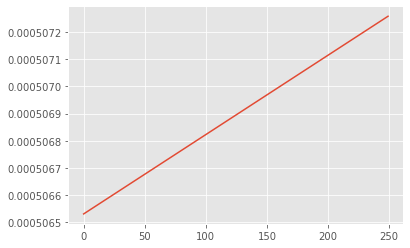

In [65]:
x = np.linspace(-3,3,num=250)
gold_dist = stats.norm(np.mean(chall_df_clean['blueTotalGold']), np.std(chall_df_clean['blueTotalGold']))
plt.plot(gold_dist.cdf(x));

In [66]:
bootstrap_sample_medians = []
for i in range(10000):
    bootstrap = np.random.choice(chall_df_clean['blueWardPlaced'], size=len(chall_df_clean['blueWardPlaced']), replace=True)
    bootstrap_median = np.median(bootstrap)
    bootstrap_sample_medians.append(bootstrap_median)
bootstrap_sample_medians

[59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 58.0,
 59.0,
 59.0,
 59.0,
 58.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 58.0,
 59.0,
 58.0,
 58.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 58.0,
 58.0,
 59.0,
 59.0,
 58.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 58.0,
 59.0,
 58.0,
 59.0,
 58.0,
 59.0,
 58.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 58.0,
 59.0,
 59.0,
 59.0,
 58.0,
 58.0,
 59.0,
 59.0,
 58.0,
 59.0,
 58.0,
 58.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 58.0,
 59.0,
 58.0,
 59.0,
 59.0,
 59.0,
 58.0,
 58.0,
 59.0,
 59.0,
 58.0,
 58.0,
 59.0,
 59.0,
 59.0,
 58.0,
 59.0,
 59.0,
 59.0,
 59.0,
 58.0,
 59.0,
 58.0,
 58.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 58.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 59.0,
 58.0,
 59.0,
 58.0,

In [67]:
bootstrap_sample_means = []
for i in range(10000):
    bootstrap = np.random.choice(chall_df_clean['blueTotalGold'], size=len(chall_df_clean['blueTotalGold']), replace=True)
    bootstrap_mean = np.mean(bootstrap)
    bootstrap_sample_means.append(bootstrap_mean)
bootstrap_sample_means

[48807.26944412997,
 48761.295520585685,
 48665.600022642364,
 48591.35220196989,
 48731.35812672176,
 48607.31389863769,
 48792.24283935243,
 48723.86505151138,
 48860.18291256274,
 48807.88675044342,
 48813.58568247858,
 48807.390769462996,
 48915.9740367561,
 48818.18487490094,
 48672.50677384052,
 48618.513943922415,
 48673.46903656742,
 48682.140948715045,
 48711.76825540586,
 48738.59877731235,
 48826.429261481564,
 48707.93297860296,
 48677.55307747462,
 48798.69074304691,
 48724.22740480773,
 48760.03766179856,
 48703.14566587418,
 48568.53560511718,
 48704.08509755085,
 48680.453828446356,
 48548.31937054228,
 48713.01237782558,
 48694.219781878564,
 48926.4832257821,
 48721.14808105966,
 48782.409789048645,
 48669.20823427299,
 48886.375070757385,
 48722.07502169893,
 48687.20219630929,
 48786.74470734745,
 48783.17706328541,
 48777.35197554625,
 48963.713536359865,
 48713.13079738858,
 48565.511075889655,
 48866.495037548586,
 48826.41469489415,
 48763.15200573607,
 48718.85

In [68]:
left_endpoint = np.percentile(bootstrap_sample_medians, 2.5)
right_endpoint = np.percentile(bootstrap_sample_medians, 97.5)

print("Sample 75'th Percentile: {:2.2f}".format(np.mean(chall_df_clean['blueWardPlaced'])))
print("Bootstrap Confidence Interval for Population 75'th Percentile: [{:2.2f}, {:2.2f}]".format(
    left_endpoint, right_endpoint))

Sample 75'th Percentile: 59.49
Bootstrap Confidence Interval for Population 75'th Percentile: [58.00, 59.00]


In [70]:
wins_and_gold = chall_df[['blueWins','blueTotalGold', 'redTotalGold']]

In [71]:
a = wins_and_gold[wins_and_gold['blueTotalGold'] > wins_and_gold['redTotalGold']]

In [72]:
a

,blueWins,blueTotalGold,redTotalGold
1,1,41072,37136
4,1,74955,74596
5,1,52221,44280
7,1,59163,47408
8,1,57940,49906
...,...,...,...
26893,0,69407,68038
26895,1,60024,54977
26898,1,51215,37657
26902,1,58160,52625


In [73]:
b = wins_and_gold[wins_and_gold['blueTotalGold'] > wins_and_gold['redTotalGold'] + 1000]

In [74]:
c = wins_and_gold[wins_and_gold['blueTotalGold'] > wins_and_gold['redTotalGold'] + 2000]
d = wins_and_gold[wins_and_gold['blueTotalGold'] > wins_and_gold['redTotalGold'] + 3000]

In [75]:
b

,blueWins,blueTotalGold,redTotalGold
1,1,41072,37136
5,1,52221,44280
7,1,59163,47408
8,1,57940,49906
9,1,39014,32064
...,...,...,...
26893,0,69407,68038
26895,1,60024,54977
26898,1,51215,37657
26902,1,58160,52625


In [76]:
a_samples = a['blueWins']
b_samples = b['blueWins']
c_samples = c['blueWins']
d_samples = d['blueWins']

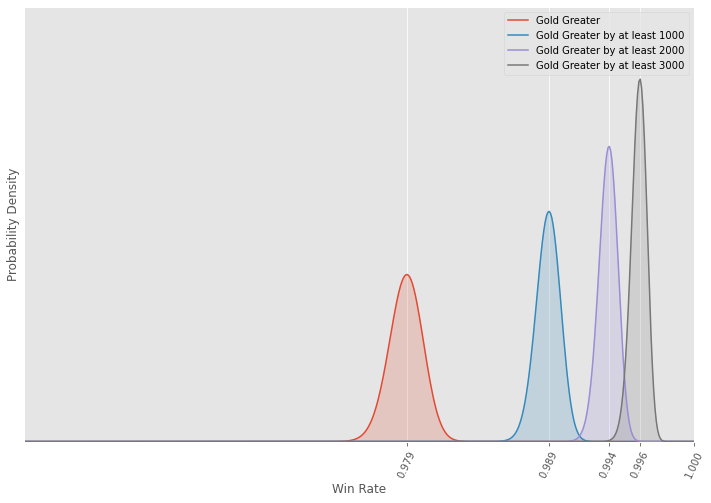

In [77]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

plot_beta_dist(a_samples, ax, label="Gold Greater", xlim=(0.95,1))
plot_beta_dist(b_samples, ax, label="Gold Greater by at least 1000", xlim=(0.95,1))
plot_beta_dist(c_samples, ax, label="Gold Greater by at least 2000", xlim=(0.95,1))
plot_beta_dist(d_samples, ax, label="Gold Greater by at least 3000", xlim=(0.95,1))
ax.legend()
ax.get_xaxis().set_ticks([0,np.mean(a_samples),np.mean(b_samples),np.mean(c_samples),np.mean(d_samples),1])
ax.tick_params(axis='x', rotation=65)
ax.set_xlim(0.95,1)

plt.savefig("gold_graph.png");

In [78]:
columns = ['blueWins','blueWardPlaced', 'redWardPlaced']
population = stats.norm(0.9, 0.6)
c_vision_samples = get_samples(chall_df, columns, 'blueWardPlaced', 'redWardPlaced', 4)
d_vision_samples = get_samples(chall_df, columns, 'blueWardPlaced', 'redWardPlaced', 6)
e_vision_samples = get_samples(chall_df, columns, 'blueWardPlaced', 'redWardPlaced', 8)
f_vision_samples = get_samples(chall_df, columns, 'blueWardPlaced', 'redWardPlaced', 10)
g_vision_samples = get_samples(chall_df, columns, 'blueWardPlaced', 'redWardPlaced', 12)

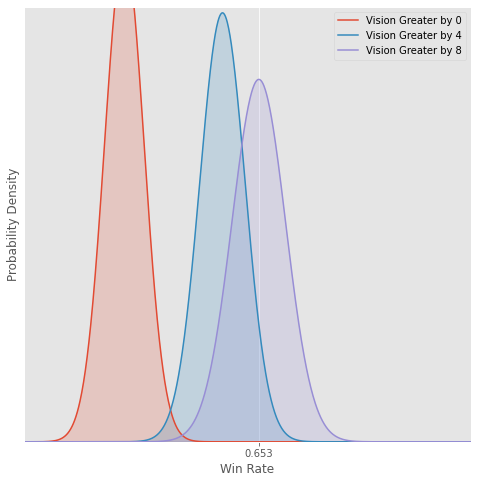

In [79]:
fig, ax = plt.subplots(1,1,figsize=(8,8))
for i in range(0,9,4):
    a_vision_samples = get_samples(chall_df, columns, 'blueWardPlaced', 'redWardPlaced',i)
    plot_beta_dist(a_vision_samples, ax, label=f"Vision Greater by {i}",xlim=(0.6,0.7))

ax.legend()

26904
26499


(array([3.500e+01, 8.900e+01, 1.750e+02, 8.630e+02, 9.000e+02, 1.219e+03,
        2.054e+03, 1.982e+03, 2.209e+03, 2.510e+03, 2.539e+03, 2.476e+03,
        2.280e+03, 2.087e+03, 1.678e+03, 1.220e+03, 8.260e+02, 4.970e+02,
        3.160e+02, 2.220e+02, 1.110e+02, 8.100e+01, 5.300e+01, 3.000e+01,
        1.700e+01, 1.200e+01, 1.000e+01, 4.000e+00, 1.000e+00, 3.000e+00]),
 array([  8979. ,  12743.7,  16508.4,  20273.1,  24037.8,  27802.5,
         31567.2,  35331.9,  39096.6,  42861.3,  46626. ,  50390.7,
         54155.4,  57920.1,  61684.8,  65449.5,  69214.2,  72978.9,
         76743.6,  80508.3,  84273. ,  88037.7,  91802.4,  95567.1,
         99331.8, 103096.5, 106861.2, 110625.9, 114390.6, 118155.3,
        121920. ]),
 <a list of 30 Patch objects>)

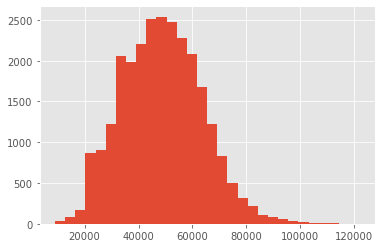

In [80]:
print(len(chall_df))
print(len(chall_df_clean))
plt.hist(chall_df_clean['blueTotalGold'], bins=30)

In [81]:
750/165

4.545454545454546

In [82]:
a_vision_samples = get_samples(chall_df, columns, 'blueWardPlaced', 'redWardPlaced')
b_vision_samples = get_samples(chall_df, columns, 'blueWardPlaced', 'redWardPlaced', 30)

In [83]:
num_simulations = 100_000

alpha, beta = get_beta_dist_params(a_vision_samples)[:2]
print(alpha, beta)
dist_A = stats.beta(alpha, beta)

alpha, beta = get_beta_dist_params(b_vision_samples)[:2]
print(alpha, beta)
dist_B = stats.beta(alpha, beta)

simulated_A = dist_A.rvs(num_simulations)
simulated_B = dist_B.rvs(num_simulations)

print((simulated_B > simulated_A).mean())

7431 4508
331 238
0.0268


In [84]:
stats.beta(331, 238).ppf([0.025, .975])

array([0.54097099, 0.62192946])

In [85]:
stats.beta(7431, 4508).ppf([0.025, 0.975])

array([0.6136992 , 0.63108983])

In [86]:
vision_zero = chall_df_clean.copy()
vision_zero = vision_zero[vision_zero['blueVisionScore'] == 0]
vision_zero = vision_zero[vision_zero['redVisionScore'] == 0]
vision_zero

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,...,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt,blueVisionScore,redVisionScore,logblueTotalGold
284,4206501111,1118,1,1,1,0,0,1,0,0,...,211,79,15.8,0,8,9837,2759,0,0,11.017382
289,4204484753,967,1,0,0,0,0,1,0,0,...,186,74,14.8,0,9,27172,2728,0,0,10.916487
290,4204457873,1361,1,0,1,0,0,1,0,0,...,254,90,18.0,0,13,41164,4335,0,0,11.236038
430,4244743719,1836,0,0,0,0,0,0,0,0,...,410,90,18.0,0,18,56530,5254,0,0,11.444786
431,4244742882,1072,0,0,0,0,0,0,0,0,...,199,86,17.2,0,13,34551,5507,0,0,10.983579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26828,4111772817,1414,1,1,0,0,0,0,0,0,...,300,90,18.0,0,10,34948,9831,0,0,11.195512
26849,4176784999,1362,1,1,1,0,0,0,0,0,...,290,90,18.0,0,12,28628,5931,0,0,11.199885
26851,4056198775,1594,1,0,0,0,0,1,0,0,...,343,90,18.0,0,12,35372,4200,0,0,11.301945
26875,4172591385,1262,1,0,1,0,0,0,0,0,...,222,89,17.8,0,13,25104,6564,0,0,11.117970


In [87]:
24693/26499

0.9318464847730104

In [135]:
columns = ['blueWardPlaced','blueKills']
x = sm.tools.tools.add_constant(chall_df_clean[columns].values)
y = chall_df_clean['blueTotalGold']
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          blueTotalGold   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                 5.353e+04
Date:                Thu, 29 Oct 2020   Prob (F-statistic):               0.00
Time:                        13:02:09   Log-Likelihood:            -2.0902e+05
No. Observations:               20924   AIC:                         4.180e+05
Df Residuals:                   20921   BIC:                         4.181e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.574e+04    110.329    142.668      0.0

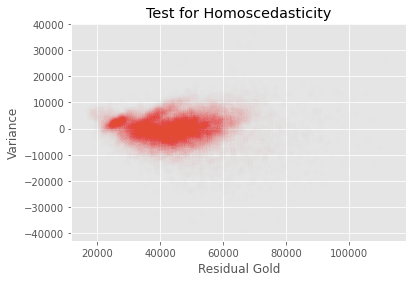

In [138]:
y_predict = results.predict(x)
residuals = y_predict - y
# y_predict
fig,ax = plt.subplots(1,1)
ax.scatter(y_predict,residuals, alpha=0.005)
plt.title("Test for Homoscedasticity")
ax.set_xlabel("Residual Gold")
ax.set_ylabel("Variance");

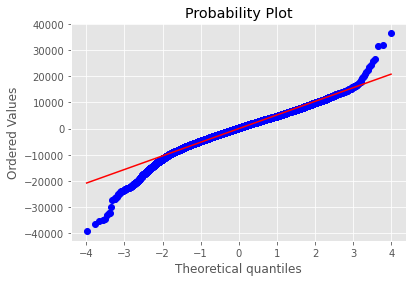

In [139]:
stats.probplot(residuals, dist="norm", plot=plt);

In [140]:
df = pd.read_csv("Data/high_diamond_ranked_10min.csv")

columns = ['blueWardsPlaced','blueKills']

xtest = sm.tools.tools.add_constant(df[columns].values)
ytest = df['blueTotalGold']

yhat = results.predict(xtest)
prediction = list(map(round,yhat))

Actual = np.array(list(ytest.values))
print(prediction[0:50])
print(Actual[0:50])

[28428.0, 22203.0, 24490.0, 26421.0, 33494.0, 23193.0, 24985.0, 22863.0, 24655.0, 21471.0, 22626.0, 31046.0, 24985.0, 21636.0, 21801.0, 21235.0, 27015.0, 25525.0, 23688.0, 22038.0, 27911.0, 21471.0, 22131.0, 32196.0, 26564.0, 22131.0, 25882.0, 25150.0, 40237.0, 21400.0, 27438.0, 23028.0, 23099.0, 22698.0, 27719.0, 22390.0, 19513.0, 23523.0, 23830.0, 21400.0, 23946.0, 30645.0, 26778.0, 22203.0, 21400.0, 23402.0, 27911.0, 26047.0, 20008.0, 22863.0]
[17210 14712 16113 15157 16400 15899 16874 15305 16401 15057 15474 16695
 17865 14979 15722 15015 19733 14852 16282 14994 18606 15878 15773 15906
 16515 15415 17178 17226 17474 14905 18132 16053 16438 15634 16085 14981
 15421 15665 17528 15032 15483 19226 16945 15000 15888 12925 19250 18355
 13978 15851]


In [162]:
columns = ['blueWardPlaced','blueKills']

Xtrain = sm.tools.tools.add_constant(chall_df_clean[columns].values) 
ytrain = chall_df_clean[['blueWins']] 
   
# building the model and fitting the data 
log_reg = sm.Logit(ytrain, Xtrain).fit() 

Optimization terminated successfully.
         Current function value: 0.537026
         Iterations 6


In [163]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               blueWins   No. Observations:                20924
Model:                          Logit   Df Residuals:                    20921
Method:                           MLE   Df Model:                            2
Date:                Thu, 29 Oct 2020   Pseudo R-squ.:                  0.2252
Time:                        13:23:46   Log-Likelihood:                -11237.
converged:                       True   LL-Null:                       -14503.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0300      0.058    -52.695      0.000      -3.143      -2.917
x1             0.0103      0.001     14.263      0.000       0.009       0.012
x2             0.1145      0.002     63.754      0.000       0.111       0.118
==============================================================================
"""

In [164]:
df = pd.read_csv("Data/high_diamond_ranked_10min.csv")

columns = ['blueWardsPlaced','blueKills']

xtest = sm.tools.tools.add_constant(df[columns].values)
ytest = df['blueWins']

yhat = log_reg.predict(xtest)
prediction = list(map(round,yhat))

Actual = np.array(list(ytest.values))

In [167]:
print(np.sum(prediction))
print(Actual[0:50])

2.0
[0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0
 0 0 0 0 1 1 1 0 0 1 1 1 0]


In [146]:
from sklearn.metrics import (confusion_matrix,  
                           accuracy_score) 
  
# confusion matrix 
cm = confusion_matrix(ytest, prediction)  
print ("Confusion Matrix : \n", cm)  
  
# accuracy score of the model 
print('Test accuracy = ', accuracy_score(ytest, prediction))


Confusion Matrix : 
 [[4949    0]
 [4928    2]]
Test accuracy =  0.5011640854337484


In [252]:
hyp_test_df = chall_df_clean[(chall_df_clean['blueFirstDragon'] > 0) & (chall_df_clean['blueFirstTower'] == 0)]
hyp_test_df2 = chall_df_clean[(chall_df_clean['blueFirstTower'] > 0) & (chall_df_clean['blueFirstDragon'] == 0)]
drag_total = len(hyp_test_df)
tow_total = len(hyp_test_df2)
drag_sample_freq = np.sum(hyp_test_df['blueWins'])/drag_total
print(f"First dragon win frequency: {drag_sample_freq:2.2f}")
tow_sample_freq = np.sum(hyp_test_df2['blueWins'])/tow_total
print(f"First tower win frequency: {tow_sample_freq:2.2f}")
print(f"First Dragon win frequency: {drag_sample_freq}, First Tower win frequency: {tow_sample_freq}")
difference_in_sample_proportions = tow_sample_freq - drag_sample_freq
print("Difference in sample proportions: {:2.2f}".format(difference_in_sample_proportions))

First dragon win frequency: 0.36
First tower win frequency: 0.66
First Dragon win frequency: 0.35625664657922723, First Tower win frequency: 0.6557166452560103
Difference in sample proportions: 0.30


In [242]:
total = drag_total + tow_total
shared_sample_freq = (np.sum(hyp_test_df['blueWins']) + np.sum(hyp_test_df2['blueWins'])) / total
print(f'Estimated combined frequency: {shared_sample_freq}')
shared_sample_variance = total * (shared_sample_freq * (1 - shared_sample_freq)) / (drag_total * tow_total)
print(shared_sample_variance)
difference_in_proportions = stats.norm(0, np.sqrt(shared_sample_variance))

Estimated combined frequency: 0.5535671100362757
0.00013295726628933927


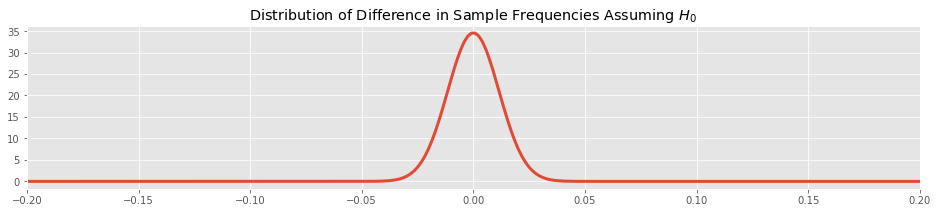

In [243]:
fig, ax = plt.subplots(1, figsize=(16, 3))

x = np.linspace(-.2, .2, num=250)
ax.plot(x, difference_in_proportions.pdf(x), linewidth=3)
ax.set_xlim(-.2, .2)
ax.set_title("Distribution of Difference in Sample Frequencies Assuming $H_0$");

0.01896632967876343


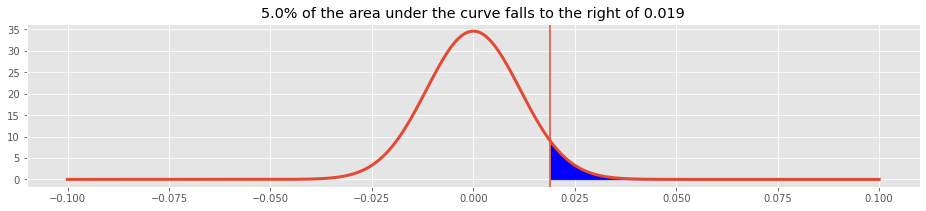

In [244]:
𝛼 = 0.05
x = np.linspace(-.1, .1, num=2500)
threshold = difference_in_proportions.ppf(1-𝛼)
print(threshold)

fig, ax = plt.subplots(1, figsize=(16, 3))

ax.plot(x, difference_in_proportions.pdf(x), linewidth=3)
ax.axvline(threshold)
ax.fill_between(x, 0, difference_in_proportions.pdf(x), x>threshold, color = 'blue')
ax.set_title(f'{100*𝛼}% of the area under the curve falls to the right of {round(threshold,3)}');

In [245]:
p_value = 1 - difference_in_proportions.cdf(difference_in_sample_proportions)
print("p-value for kickfip frequency comparison: {:2.3f}".format(p_value))

p-value for kickfip frequency comparison: 0.000


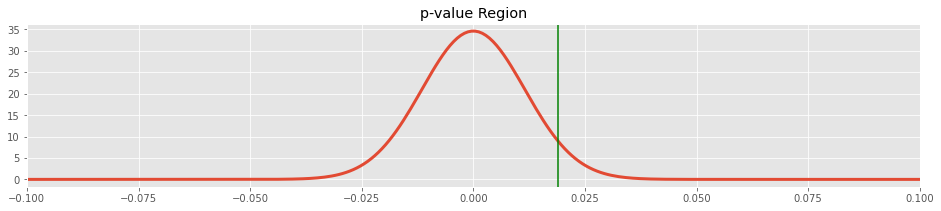

In [246]:
fig, ax = plt.subplots(1, figsize=(16, 3))

x = np.linspace(-.1, .1, num=250)
ax.plot(x, difference_in_proportions.pdf(x), linewidth=3)
ax.axvline(threshold, color = 'green')
ax.fill_between(x, difference_in_proportions.pdf(x), where=(x >= difference_in_sample_proportions),
                color="red", alpha=0.5)
ax.set_xlim(-.1, .1)
ax.set_title("p-value Region");

In [247]:
import statsmodels.stats.api as sms

X2 = hyp_test_df['blueWins']
X1 = hyp_test_df2['blueWins']

cm = sms.CompareMeans(sms.DescrStatsW(X1), sms.DescrStatsW(X2))
print(cm)
print(cm.tconfint_diff(alternative='larger',usevar='unequal'))

(0.281232282285465, inf)


In [248]:
cm.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,0.2995,0.011,27.096,0.000,0.278,0.321


In [255]:
hyp_test_df = gm_df_clean[(gm_df_clean['blueFirstDragon'] > 0) & (gm_df_clean['blueFirstTower'] == 0)]
hyp_test_df2 = gm_df_clean[(gm_df_clean['blueFirstTower'] > 0) & (gm_df_clean['blueFirstDragon'] == 0)]

drag_total = len(hyp_test_df)
tow_total = len(hyp_test_df2)
drag_sample_freq = np.sum(hyp_test_df['blueWins'])/drag_total
print(f"First dragon win frequency: {drag_sample_freq:2.2f}")
tow_sample_freq = np.sum(hyp_test_df2['blueWins'])/tow_total
print(f"First tower win frequency: {tow_sample_freq:2.2f}")
print(f"First Dragon win frequency: {drag_sample_freq}, First Tower win frequency: {tow_sample_freq}")
difference_in_sample_proportions = tow_sample_freq - drag_sample_freq
print("Difference in sample proportions: {:2.2f}".format(difference_in_sample_proportions))

First dragon win frequency: 0.35
First tower win frequency: 0.66
First Dragon win frequency: 0.34559477899733015, First Tower win frequency: 0.6632116569025086
Difference in sample proportions: 0.32


In [256]:
hyp_test_df = m_df_clean[(m_df_clean['blueFirstDragon'] > 0) & (m_df_clean['blueFirstTower'] == 0)]
hyp_test_df2 = m_df_clean[(m_df_clean['blueFirstTower'] > 0) & (m_df_clean['blueFirstDragon'] == 0)]

drag_total = len(hyp_test_df)
tow_total = len(hyp_test_df2)
drag_sample_freq = np.sum(hyp_test_df['blueWins'])/drag_total
print(f"First dragon win frequency: {drag_sample_freq:2.2f}")
tow_sample_freq = np.sum(hyp_test_df2['blueWins'])/tow_total
print(f"First tower win frequency: {tow_sample_freq:2.2f}")
print(f"First Dragon win frequency: {drag_sample_freq}, First Tower win frequency: {tow_sample_freq}")
difference_in_sample_proportions = tow_sample_freq - drag_sample_freq
print("Difference in sample proportions: {:2.2f}".format(difference_in_sample_proportions))

First dragon win frequency: 0.34
First tower win frequency: 0.67
First Dragon win frequency: 0.33789579341180764, First Tower win frequency: 0.6681529924692826
Difference in sample proportions: 0.33
